# RMS to interval velocity problem 

Forward mapping 

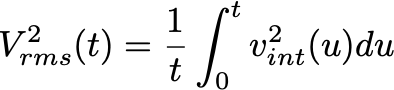

- $v_int$: interval velocity
- $V_{rms}$: rms velocity 

inverse mapping 

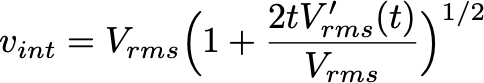

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## define interval velocity 

$$v_{int} = v_0 + a \sin(2\pi f t)$$

In [2]:
def interval_velocity_analytic(time, velocity0, amplitude, frequency): 
    """
    define our interval velocity as a harmonic function with amplitude (a), frequency (f), and base-value v0
    """
    return velocity0 + amplitude *np.sin(2*np.pi*frequency*time)

In [3]:
a = 50
v0 = 2000 
f = 2

In [4]:
n_times = 200 
max_time = 2
time = np.linspace(0, 2, n_times)

In [5]:
# vint = interval_velocity_analytic(time, v0, a, f)
vint = interval_velocity_analytic(time=time, velocity0=v0, amplitude=a, frequency=f)

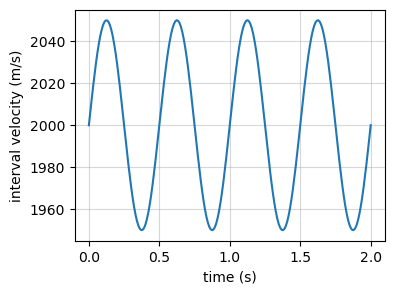

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3)) 

ax.plot(time, vint)
ax.set_xlabel("time (s)")
ax.set_ylabel("interval velocity (m/s)")
ax.grid(alpha=0.5)

# forward problem 

$$V_{rms}^2 (t) = \frac{1}{t}\int_0^{t_{max}} v_{int}^2(u) du$$

with 
- $v_{int} = v_0 + a \sin(2\pi f t)$
- $v_{int} = v_0 + a \sin(\omega t)$

The answer 

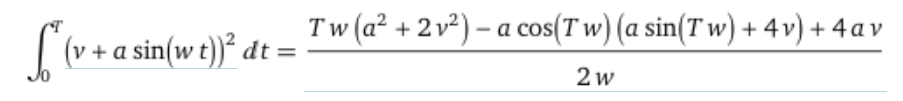

In [16]:
def rms_velocity_analytic(time, velocity0, amplitude, frequency): 
    omega = 2*np.pi*frequency

    inds_nonzero = time > 0 # in practice, you might want to pick a small number
    vrms2 = np.zeros_like(time) 
    # vrms2 = velocity0**2 * np.ones_like(time) 
    
    vrms2[inds_nonzero] = 1/time[inds_nonzero] * (
        (
            time[inds_nonzero] * omega * (amplitude**2 + 2 * velocity0**2)
            - amplitude * np.cos(time[inds_nonzero] * omega) * (amplitude * np.sin(time[inds_nonzero] * omega) + 4 * velocity0)
            + 4 * amplitude * velocity0
        ) / (2 * omega)
    )
    
    vrms = np.sqrt(vrms2)
    vrms[~inds_nonzero] = velocity0
    return vrms

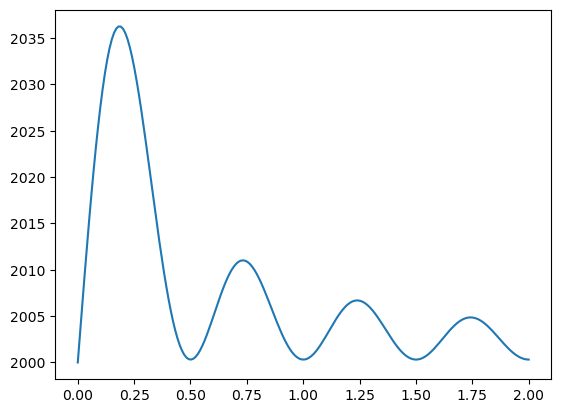

In [17]:
rms_velocity = rms_velocity_analytic(time, v0, a, f)

plt.plot(time, rms_velocity)

# estimate vint from vrms2

$$v_{int} = V_{RMS} \left(1 + \frac{2 t V'_{RMS}}{V_{RMS}}\right)^{1/2}$$

In [24]:
dt = np.diff(time)
vrms = rms_velocity_analytic(time, v0, a, f)

In [27]:
dvdt_approx = np.diff(vrms) / dt
dvdt_approx = np.r_[0, dvdt_approx]  # forward difference

In [28]:
vint_rec = vrms * np.sqrt(
    1 + (2 * time * dvdt_approx)/vrms
)

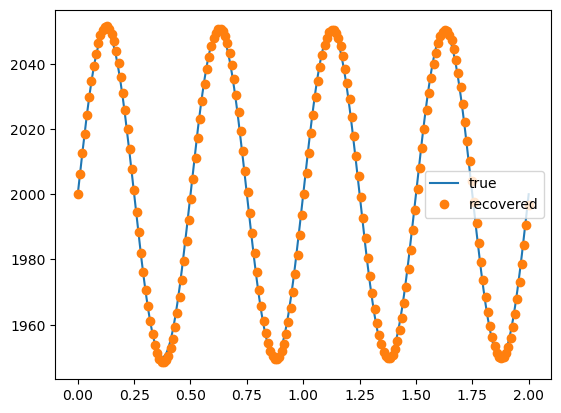

In [32]:
fig, ax = plt.subplots(1,1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_rec, "o", label="recovered")
ax.legend()